# Sprint 深層学習スクラッチ ニューラルネットワーク

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import copy

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [25]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [26]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [27]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

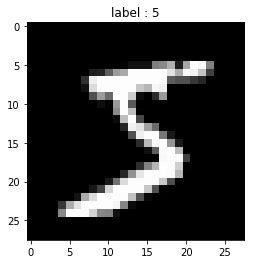

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

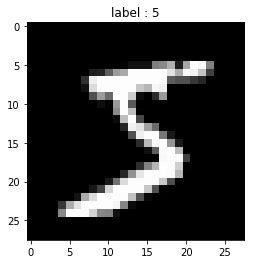

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [29]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

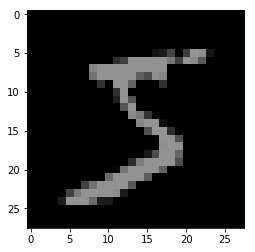

In [30]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

In [31]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [32]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [34]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """

    def __init__(self, X, y, batch_size=20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0] / self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self, item):
        p0 = item * self.batch_size
        p1 = item * self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter * self.batch_size
        p1 = self._counter * self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [35]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    pass

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([4, 5, 6, 1, 4, 9, 6, 9, 6, 3, 8, 2, 5, 6, 4, 4, 0, 2, 4, 0],
      dtype=uint8))


In [36]:
batch_size = 20 # バッチサイズ
n_features = 784 # 特徴量の数
n_nodes1 = 400 # 1層目のノード数
n_nodes2 = 200 # 2層目のノード数
n_output = 10 # 出力のクラス数（3層目のノード数）

In [37]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """

    def __init__(self, epoch=20, n_batch=20, bias=False, func="sigmoid", lr=0.001, n_nodes1=400, n_nodes2=200, n_output=10, verbose=True):
        self.verbose = verbose
        self.epoch = epoch
        self.n_batch = n_batch
        self.bias = bias
        self.func = func
        self.lr = lr
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.epoch)
        self.val_loss = np.zeros(self.epoch)
        
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, self.n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, self.n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        self.n_features = X.shape[1]

        enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
        y_train_one_hot = enc.fit_transform(y[:, np.newaxis])
        
        if y_val is not None:
            y_val_one_hot = enc.fit_transform(y_val[:, np.newaxis])
        
        self.epoch_cnt = 0
        self.batch_cnt = 0
        
        self.W_list, self.b_list = self._init_network()
        self.default_W_list, self.default_b_list = copy.deepcopy(self.W_list), copy.deepcopy(self.b_list)
                
        for i in range(self.epoch):
            get_mini_batch = GetMiniBatch(X, y_train_one_hot, batch_size=20)

            for mini_X_train, mini_y_train in get_mini_batch:
                # フォワードプロバゲーション**************************
                self.A_list, self.Z_list = self._forward(mini_X_train, self.W_list, self.b_list)

                # バックプロバゲーション**************************            
                self._backward(mini_X_train, mini_y_train, self.W_list, self.b_list, self.A_list, self.Z_list)
            
            # クロスエントロピー誤差**************************
            self.loss[i] = self._cross_entropy_error(mini_y_train, self.Z_list[-1])
        
        # 問題7 val_loss計算
        if X_val is not None and y_val is not None:
            self.val_W_list, self.val_b_list = self._init_network()
            self.default_val_W_list, self.default_val_b_list = copy.deepcopy(self.val_W_list), copy.deepcopy(self.val_b_list)
            
            for i in range(self.epoch):
                get_mini_batch = GetMiniBatch(X_val, y_val_one_hot, batch_size=20)

                for mini_X_val, mini_y_val in get_mini_batch:
                    # フォワードプロバゲーション**************************
                    self.val_A_list, self.val_Z_list = self._forward(mini_X_val, self.val_W_list, self.val_b_list)

                    # バックプロバゲーション**************************            
                    self._backward(mini_X_val, mini_y_val, self.val_W_list, self.val_b_list, self.val_A_list, self.val_Z_list)

                self.val_loss[i] = self._cross_entropy_error(mini_y_val, self.val_Z_list[-1])

        if self.verbose:
            # verboseをTrueにした際は学習過程などを出力する
            pass

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, self.n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        _, Z = self._forward(X, self.W_list, self.b_list)        
        pred = np.argmax(Z[-1], axis=1)
        return pred
    
    def accuracy(self, val, pred):
        return accuracy_score(val, pred)

    # 問題1
    # 重み初期化
    def _init_network(self):
        """重み初期値作成関数


        """

        sigma = 0.01  # ガウス分布の標準偏差
        
        # 重みは前ノード数の１/ルートが適切
        W1 = sigma * np.random.randn(self.n_features, self.n_nodes1)
        W2 = sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        W3 = sigma * np.random.randn(self.n_nodes2, self.n_output)
        
        # バイアス項はランダム値か0かでパラメータ選択
        if self.bias==True:
            b1 = sigma * np.random.randn(self.n_nodes1)
            b2 = sigma * np.random.randn(self.n_nodes2)
            b3 = sigma * np.random.randn(self.n_output)
        
        else:
            b1 = np.zeros(self.n_nodes1)
            b2 = np.zeros(self.n_nodes2)
            b3 = np.zeros(self.n_output)

        W_list = [W1, W2, W3]
        b_list = [b1, b2, b3]

        return W_list, b_list

    # 問題2
    # 活性化関数（フォワードプロバゲーション）
    def _forward(self, X, W, b):
        """
        X :
        """
        # sigmoid
        if self.func == "sigmoid":            
            A1 = np.dot(X, W[0]) + b[0]     #(20, 400)
            Z1 = self._sigmoid(A1)
            A2 = np.dot(Z1, W[1]) + b[1]   #(20, 200)
            Z2 = self._sigmoid(A2)
            A3 = np.dot(Z2, W[2]) + b[2]   #(20, 10)
            Z3 = self._softmax(A3)
        
        # tanh
        else:
            A1 = np.dot(X, W[0]) + b[0]     #(20, 400)
            Z1 = self._hyperbolic_tangent(A1)
            A2 = np.dot(Z1, W[1]) + b[1]   #(20, 200)
            Z2 = self._hyperbolic_tangent(A2)
            A3 = np.dot(Z2, W[2]) + b[2]   #(20, 10)
            Z3 = self._softmax(A3)

        A_list = [A1, A2, A3]
        Z_list = [Z1, Z2, Z3]    # Z[-1]:Z3が予測値
        
        return A_list, Z_list

    # 問題4
    # 確率的勾配降下法(バックプロパゲーション)
    # ここのコード：書き足しで進めて行き、長くなってしまった。分岐自体はシンプルなので、中身は薄い。何かアドバイスがほしい。
    def _backward(self, X, y, W, b, A, Z):
        if self.func == "sigmoid":
            # 3層目
            gra_a_3 = Z[-1] - y
            gra_b_3 = np.sum(gra_a_3, axis=0)
            gra_W_3 = np.dot(Z[1].T, gra_a_3)
            gra_z_3 = np.dot(gra_a_3, W[-1].T)

            # 2層目
            gra_a_2 = gra_z_3*np.multiply((1-self._sigmoid(A[1])), self._sigmoid(A[1]))
            gra_b_2 = np.sum(gra_a_2, axis=0)
            gra_W_2 = np.dot(Z[0].T, gra_a_2)
            gra_z_2 = np.dot(gra_a_2, W[1].T)

            # 1層目
            gra_a_1 = gra_z_2*np.multiply((1-self._sigmoid(A[0])), self._sigmoid(A[0]))
            gra_b_1 = np.sum(gra_a_1, axis=0)
            gra_W_1 = np.dot(X.T, gra_a_1)

            gra_b_list = [gra_b_1, gra_b_2, gra_b_3]
            gra_W_list = [gra_W_1, gra_W_2, gra_W_3]

            for i in range(3):
                W[i] -= self.lr*gra_W_list[i]
                b[i] -= self.lr*gra_b_list[i]    

        if self.func == "tanh":
            # 3層目
            gra_a_3 = Z[-1] - y
            gra_b_3 = np.sum(gra_a_3, axis=0)
            gra_W_3 = np.dot(Z[1].T, gra_a_3)
            gra_z_3 = np.dot(gra_a_3, W[-1].T)

            # 2層目
            gra_a_2 = gra_z_3*((1-self._hyperbolic_tangent(A[1])**2))
            gra_b_2 = np.sum(gra_a_2, axis=0)
            gra_W_2 = np.dot(Z[0].T, gra_a_2)
            gra_z_2 = np.dot(gra_a_2, W[1].T)

            # 1層目
            gra_a_1 = gra_z_2*((1-self._hyperbolic_tangent(A[0])**2))
            gra_b_1 = np.sum(gra_a_1, axis=0)
            gra_W_1 = np.dot(X.T, gra_a_1)

            gra_b_list = [gra_b_1, gra_b_2, gra_b_3]
            gra_W_list = [gra_W_1, gra_W_2, gra_W_3]

            for i in range(3):
                W[i] -= self.lr*gra_W_list[i]
                b[i] -= self.lr*gra_b_list[i]    

    
    # 問題2------------------------------------
    # シグモイド関数
    def _sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

    #ハイパボリックタンジェント関数
    def _hyperbolic_tangent(self, X):
        return np.tanh(X)

    # ソフトマックス関数
    def _softmax(self, X):
        c = np.max(X)
        
        return np.exp(X-c) / np.sum(np.exp(X - c), axis=1, keepdims=True)

    # 問題３------------------------------------
    # クロスエントロピー誤差関数
    def _cross_entropy_error(self, y, Z):
        if y.ndim == 1:
            Z = t.reshape(1, Z.size)
            y = y.reshape(1, y.size)        
        
        batch_size = y.shape[0]
        
        error = -np.sum(y*np.log(Z + 1e-7)) / batch_size
        
        return error

# backward検算

n_features = 784
n_nodes1 = 400
n_nodes2 = 200
n_output = 10
sigma = 0.01  # ガウス分布の標準偏差

tmpW1 = sigma * np.random.randn(n_features, n_nodes1)
tmpW2 = np.random.randn(n_nodes1, n_nodes2) / np.sqrt(n_nodes1)
tmpW3 = np.random.randn(n_nodes2, n_output) / np.sqrt(n_nodes2)
tmpb1 = sigma * np.random.randn(n_nodes1)
tmpb2 = np.random.randn(n_nodes2) / np.sqrt(n_nodes1)
tmpb3 = np.random.randn(n_output) / np.sqrt(n_nodes2)

tmp_W_list = [tmpW1, tmpW2, tmpW3]
tmp_b_list = [tmpb1, tmpb2, tmpb3]

tmpA1 = np.dot(mini_X_train, tmp_W_list[0]) + tmp_b_list[0]     #(20, 400)
tmpZ1 = scr_NN._sigmoid(tmpA1)
tmpA2 = np.dot(tmpZ1, tmp_W_list[1]) + tmp_b_list[1]   #(20, 200)
tmpZ2 = scr_NN._sigmoid(tmpA2)
tmpA3 = np.dot(tmpZ2, tmp_W_list[2]) + tmp_b_list[2]   #(20, 10)
tmpZ3 = scr_NN._softmax(tmpA3)

A_list = [tmpA1, tmpA2, tmpA3]
Z_list = [tmpZ1, tmpZ2, tmpZ3] 

gra_a_3 = Z_list[-1] - mini_y_train_hot    # (20, 10)
gra_b_3 = np.sum(gra_a_3, axis=0)     #(10,)
gra_W_3 = np.dot(Z_list[1].T, gra_a_3)   #(200, 10)
gra_z_3 = np.dot(gra_a_3, tmp_W_list[-1].T)    #(20, 200)


gra_a_2 = gra_z_3*((1-scr_NN._sigmoid(A_list[1])*scr_NN._sigmoid(A_list[1])))  #(20, 200)
gra_b_2 = np.sum(gra_a_2, axis=0)  #(200,)
gra_W_2 = np.dot(Z_list[0].T, gra_a_2)  #(400, 200)
gra_z_2 = np.dot(gra_a_2, tmp_W_list[1].T)  #(20, 400)

gra_a_1 = gra_z_2*((1-scr_NN._sigmoid(A_list[0])*scr_NN._sigmoid(A_list[0])))
gra_b_1 = np.sum(gra_a_1, axis=0)
gra_W_1 = np.dot(mini_X_train.T, gra_a_1)

## 【問題1】重みの初期値を決めるコードの作成
ニューラルネットワークの各層の重みの初期値を決めるコードを作成してください。


重みの初期値は様々な方法が提案されていますが、今回はガウス分布による単純な初期化を行います。バイアスに関しても同様です。


以下のコードを参考にしてください。標準偏差の値sigmaはハイパーパラメータです。発展的な重みの初期化方法については次のSprintで扱います。

## 【問題2】フォワードプロパゲーションの実装
三層のニューラルネットワークの フォワードプロパゲーション を作成してください。以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。


各層の数式を以下に示します。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してあります。

## 【問題3】交差エントロピー誤差の実装
目的関数（損失関数）を作成します。


多クラス分類の目的関数である交差エントロピー誤差 $L$ は次の数式です。


L
=
−
1
n
b
n
b
∑
j
  
n
c
∑
k
 
y
j
k
l
o
g
(
z
3
_
j
k
)

$y_{ij}$ : $j$ 番目のサンプルの $k$ 番目のクラスの正解ラベル（one-hot表現で0か1のスカラー）


$z_{3_ij}$ : $j$ 番目のサンプルの $k$ 番目のクラスの確率（スカラー）


$n_{b}$ : バッチサイズ、batch_size


$n_{c}$ : クラスの数、n_output（今回のMNISTでは10）


サンプル1つあたりの誤差が求まります。

## 【問題4】バックプロパゲーションの実装
三層のニューラルネットワークのバックプロパゲーションを作成してください。確率的勾配降下法を行う部分です。


数式を以下に示します。


まず、i層目の重みとバイアスの更新式です。 $W_i$ と $B_i$ に対し、更新後の $W_i^{\prime}$ と $B_i^{\prime}$ は次の数式で求められます。

$$
W
′
i
=
W
i
−
α
\frac{∂L}{∂Wi}
$$

$$
B′i
=
B
i
−
α\frac{∂L}{∂Bi}
$$

$\alpha$ : 学習率（層ごとに変えることも可能だが、基本的には全て同じとする）


$\frac{\partial L}{\partial W_i}$ : $W_i$ に関する損失 $L$ の勾配


$\frac{\partial L}{\partial B_i}$ : $B_i$ に関する損失 $L$ の勾配


＊この勾配はミニバッチのサンプル数分の合計または平均を考えます。ここでは合計を計算します。


この更新方法はSprint3線形回帰やsprint4ロジスティック回帰における最急降下法と同様です。より効果的な更新方法が知られており、それは次のSprintで扱います。


勾配 $\frac{\partial L}{\partial W_i}$ や $\frac{\partial L}{\partial B_i}$ を求めるために、バックプロパゲーションを行います。以下の数式です。ハイパボリックタンジェント関数を使用した例を載せました。シグモイド関数の場合の数式はその後ろにあります。


「3層目」

$$
\frac{∂L}{∂A3}
=
Z3−Y
$$

$$
\frac{∂L}{∂B3}
=
\sum_{j}^{n_b} \quad\frac{∂L}{∂A3_j}
$$

$$
\frac{∂L}{∂W3}
=
Z_2^T
⋅
\frac{∂L}{∂A3}
$$

$$
\frac{∂L}{∂Z2}
=
\frac{∂L}{∂A3}
⋅
W_3^T
$$

$\frac{\partial L}{\partial A_3}$ : $A_3$ に関する損失 $L$ の勾配 (batch_size, n_output)


$\frac{\partial L}{\partial A_{3_j}}$ : j番目のサンプルの$A_3$ に関する損失 $L$ の勾配 (n_nodes2,)


$\frac{\partial L}{\partial B_3}$ : $B_3$ に関する損失 $L$ の勾配 (n_output,)


$\frac{\partial L}{\partial W_3}$ : $W_3$ に関する損失 $L$ の勾配 (n_nodes2, n_output)


$\frac{\partial L}{\partial Z_2}$ : $Z_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)


$Z_{3}$ : ソフトマックス関数の出力 (batch_size, n_nodes2)


$Y$ : 正解ラベル (batch_size, n_output)


$Z_{2}$ : 2層目の活性化関数の出力 (batch_size, n_nodes2)


$W_3$ : 3層目の重み (n_nodes2, n_output)


「2層目」
$$\frac{∂L}{∂A2}=\frac{∂L}{∂Z2}⊙{1−tanh^2(A2)}$$

$$\frac{∂L}{∂B2}=\sum_{j}^{nb}\quad\frac{∂L}{∂A2_j}$$

$$\frac{∂L}{∂W2}=Z_1^T⋅\frac{∂L}{∂A2}$$

$$\frac{∂L}{∂Z1}=\frac{∂L}{∂A2}⋅W_2^T$$

$\frac{\partial L}{\partial A_2}$ : $A_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)


$\frac{\partial L}{\partial A_{2_j}}$ : j番目のサンプルの$A_2$ に関する損失 $L$ の勾配 (n_nodes2,)


$\frac{\partial L}{\partial B_2}$ : $B_2$ に関する損失 $L$ の勾配 (n_output,)


$\frac{\partial L}{\partial W_2}$ : $W_2$ に関する損失 $L$ の勾配 (n_nodes1, n_nodes2)


$\frac{\partial L}{\partial Z_2}$ : $Z_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)


$A_2$ : 2層目の出力 (batch_size, n_nodes2)


$Z_{1}$ : 1層目の活性化関数の出力 (batch_size, n_nodes1)


$W_2$ : 2層目の重み (n_nodes1, n_nodes2)


「1層目」

$$\frac{∂L}{∂A1}=\frac{∂L}{∂Z1}⊙{1−tanh^2(A1)}$$

$$\frac{∂L}{∂B1}=\sum_{j}^{nb} \quad\frac{∂L}{∂A1_j}$$

$$\frac{∂L}{∂W1}=X^T⋅\frac{∂L}{∂A1}$$

$\frac{\partial L}{\partial A_1}$ : $A_1$ に関する損失 $L$ の勾配 (batch_size, n_nodes1)


$\frac{\partial L}{\partial A_{1_j}}$ : j番目のサンプルの$A_1$ に関する損失 $L$ の勾配 (n_nodes1,)


$\frac{\partial L}{\partial B_1}$ : $B_1$ に関する損失 $L$ の勾配 (n_output,)


$\frac{\partial L}{\partial W_1}$ : $W_1$ に関する損失 $L$ の勾配 (n_features, n_nodes1)


$\frac{\partial L}{\partial Z_1}$ : $Z_1$ に関する損失 $L$ の勾配 (batch_size, n_nodes1)


$A_1$ : 1層目の出力 (batch_size, n_nodes1)


$X$ : 特徴量ベクトル (batch_size, n_features)


$W_1$ : 1層目の重み (n_features, n_nodes1)


《補足》


活性化関数にシグモイド関数を使用した場合は、次のようになります。
$$
\frac{∂L}{∂A2}=\frac{∂L}{∂Z2}⊙{1−sigmoid(A2)}sigmoid(A2)
$$
$$
\frac{∂L}{∂A1}=\frac{∂L}{∂Z1}⊙{1−sigmoid(A1)}sigmoid(A1)
$$

## 【問題6】学習と推定
MNISTのデータを学習・推定し、Accuracyを計算してください。

In [38]:
# 最も正解率の高かったlr:0.01でエポック数を20にして再度実行
scr_NN = ScratchSimpleNeuralNetrowkClassifier(epoch=20, lr=0.01, bias=False, func="tanh")

scr_NN.fit(X_train, y_train, X_val, y_val)

pred = scr_NN.predict(X_test)
print("Accuracy:{}".format(scr_NN.accuracy(y_test, pred)))

Accuracy:0.9812


In [39]:
np.bincount(pred)

array([ 983, 1134, 1036, 1005,  982,  890,  956, 1030,  974, 1010])

### 問題なく分類できているようである。

## 【問題7】学習曲線のプロット
学習曲線をプロットしてください。


ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要です。訓練データと検証データに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要があります。

In [40]:
scr_NN.loss

scr_NN.val_loss

array([0.42675193, 0.3283919 , 0.1830784 , 0.13086055, 0.09298201,
       0.06288756, 0.04015959, 0.02767756, 0.01261564, 0.00785663,
       0.00608212, 0.00695828, 0.00737417, 0.0034542 , 0.00250979,
       0.00191761, 0.0015346 , 0.00127713, 0.00109447, 0.00095934])

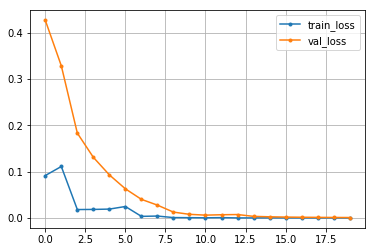

In [44]:

plt.plot(scr_NN.loss, marker=".", label="train_loss")
plt.plot(scr_NN.val_loss, marker=".", label="val_loss")

plt.grid()
plt.legend()
plt.show()

## 【問題8】（アドバンス課題）誤分類の確認
誤分類した画像はどのようなものだったかを確認してください。推定値を用意し、以下のコードを実行してください。

/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  del sys.path[0]


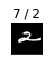

In [42]:
"""
語分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

Parameters:
----------
y_pred : 推定値のndarray (n_samples,)
y_val : 検証データの正解ラベル(n_samples,)
X_val : 検証データの特徴量（n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt
num = 36 # いくつ表示するか
true_false = pred==y_val
false_list = np.where(true_false==False)[0].astype(np.int)
if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(pred[false_list[i]],y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')

### 最後の課題は３６枚分出力されませんでしたが、提出させていただきます。